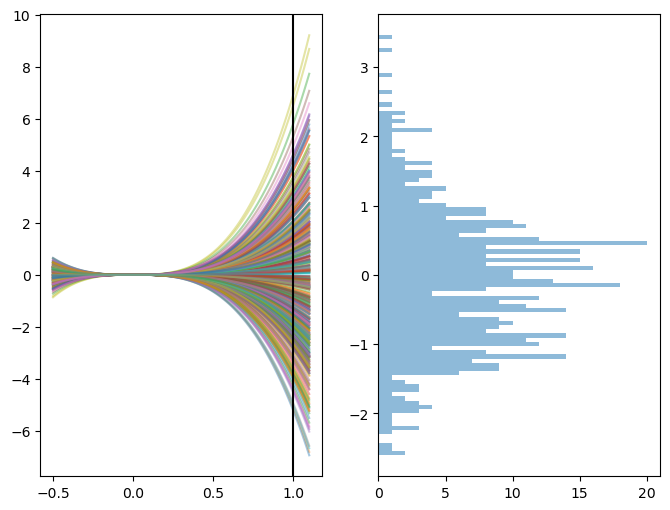

In [31]:
import numpy as np
n = 500
W = np.random.randn(n)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
t = np.linspace(-0.5,1.1,100)
for i in range(n):
    plt.plot(t, W[i]*t**3*2, alpha=0.4)

plt.axvline(x=1, c='k')

plt.subplot(1,2,2)
plt.hist(W, bins=100, alpha=0.5, orientation='horizontal');

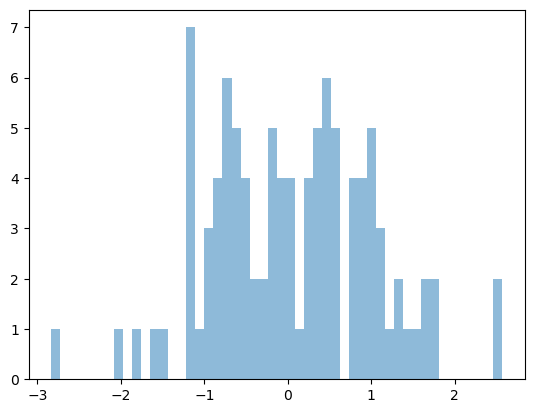

### Convolution

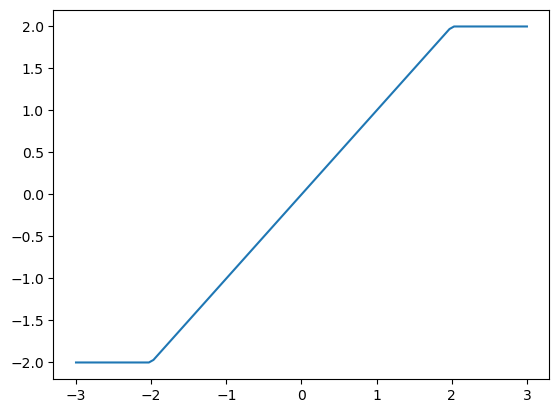

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def f(t):
    if t>2: return 2
    elif t<-2: return -2
    else: return t

t = np.linspace(-3, 3, 100)
y = [f(i) for i in t]
plt.plot(t, y)

### Scraps


In [ ]:
Gx = nx.tensor_product(train_graphs[1], train_graphs[2])
#Adjacency
Ax = nx.adjacency_matrix(Gx)  # ss.csr_matrix.toarray(nx.adjacency_matrix(G))
DPKernel(Ax)

In [ ]:
from lib import draw
import matplotlib.pyplot as plt
G0 = train_graphs[0].subgraph([4, 1, 7, 0, 15, 8])
G1 = train_graphs[1].subgraph( [0, 1, 2, 3, 5, 6, 7, 8, 10, 11])
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
draw(G0)
plt.subplot(1,2,2)
draw(G1)


In [ ]:
Gx = nx.tensor_product(G0, G1)
pos = nx.spring_layout(Gx, seed=1, k=0.3)
nx.draw(Gx, pos)
node_labels = nx.get_node_attributes(Gx, "labels")
nx.draw_networkx_labels(Gx, pos, node_labels, font_size=8);
# edge_labels = nx.get_edge_attributes(P, "labels")
# nx.draw_networkx_labels(P, pos, edge_labels, font_size=8);

In [ ]:
# plt.subplot(1,1,1)
# draw(P)
Gx.nodes()

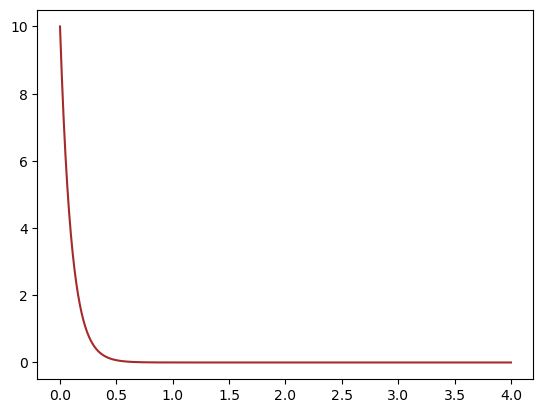

In [11]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

#define x-axis values
x = np.linspace (0, 4, 500) 

#calculate pdf of Gamma distribution for each x-value
y = stats.gamma.pdf(x, a=1, scale=0.1)
# z = stats.gamma.pdf(x, a=1.1, scale=1)


#create plot of Gamma distribution
plt.plot(x, y, 'brown')
# plt.plot(x, z, 'seagreen')

#display plot
plt.show()

Direct Product

In [ ]:
import networkx as nx
from lib import draw
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4])
G1.add_edges_from([(1,2), (2,3), (2,4)])
nx.set_node_attributes(G1, {1: 'y', 2: 'y', 3: 'b', 4: 'b'}, "labels")
nx.set_edge_attributes(G1, {e: '-' for e in G1.edges()}, "labels")


G2 = nx.Graph()
G2.add_nodes_from([chr(i) for i in range(65, 70)])
E = [(65, 66), (66, 67), (67, 68), (67, 69), (68, 69)]
G2.add_edges_from([tuple(chr(i) for i in e) for e in E])
nx.set_node_attributes(G2, {chr(i): 'y' for i in [65, 66, 68]} | {chr(i) : 'b' for i in [67, 69]}, "labels")
nx.set_edge_attributes(G2, {e: '-' for e in G2.edges()}, "labels")

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
draw(G1, 'orange')
draw(G2, 'seagreen')

plt.subplot(1,2,2)
from lib import direct_product
J = direct_product(G1, G2)
draw(J, 'gray')

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_valid_std = sc.transform(X_validate)
#
pca = PCA()
# Determine transformed features
X_train_pca = pca.fit_transform(X_train_std)

import numpy as np
# np.savetxt('WLPCA_Xtrain_4200.txt', X_train_pca)
X_train_pca.shape
#
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()